7.444441042371371
8.817107839994407
14.001779214697383
28.65974127346056
25.262590592881082
32.47500322131074
46.39770335704321
60.406291483251096
74.723985431232
85.9128149432599


Text(0, 0.5, 'variances_squqared')

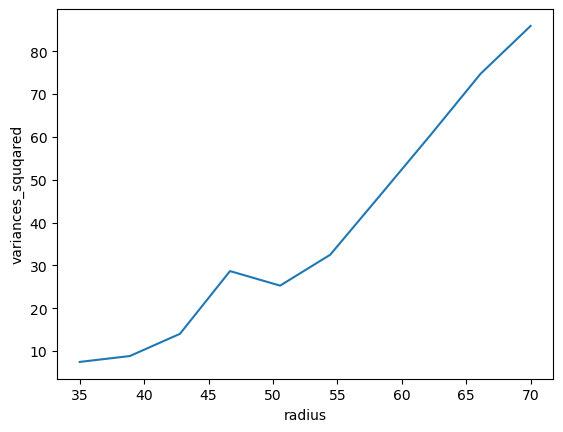

In [13]:
import calc
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(calc)
from calc import Hyperuniform_helper

file_name = 'positions.txt'
data = np.loadtxt(file_name)
rho, box_length, volume_fraction = data[0]
radius = np.linspace(box_length/4, box_length/2, 10)
scaled_variances = np.zeros(len(radius))
helper = Hyperuniform_helper(radius[0], np.zeros(3), data[1:,], rho)
for i in range(len(radius)):
    helper.set_radius(radius[i])
    r, gr = helper.calculate_radial_distribution(40, 2)
    k_values = np.linspace(0.001, 100, 1001)
    sk = helper.hankel_transform_2d(gr, r, k_values)
    variance_square = helper.variance_calculations_in_reciprocal_space_2d(sk, k_values)
    print(variance_square)
    scaled_variances[i] = variance_square

plt.plot(radius, scaled_variances)
plt.xlabel("radius")
plt.ylabel("variances_squqared")